In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

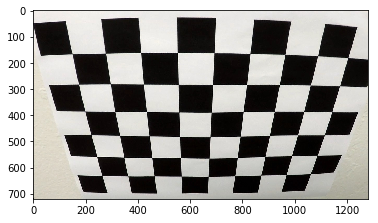

In [28]:
img = mpimg.imread("camera_cal/calibration2.jpg")
plt.imshow(img)

In [29]:
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

In [30]:
objp

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  0.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  0.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  0.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  3.,  0.],
       [ 5.,  3.,  0.],
       [ 6.,  3.,  0.],
       [ 7.,  3.,  0.],
       [ 0.,  4.,  0.],
       [ 1.,  4.,  0.],
       [ 2.,  4.,  0.],
       [ 3.,  4.,  0.],
       [ 4.,  4.,  0.],
       [ 5.,  4.,  0.],
       [ 6.,  4.,  0.],
       [ 7.,  4.,  0.],
       [ 0.,  5.,  0.],
       [ 1.,  5.

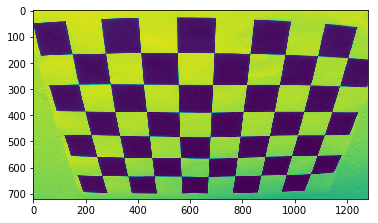

In [31]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [32]:
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

In [42]:
corners.shape

(48, 1, 2)

In [41]:
corners[7]

array([[ 1087.65527344,   174.77708435]], dtype=float32)

In [7]:
objpoints=[]

In [8]:
imgpoints=[]

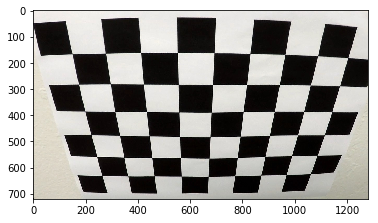

In [9]:
plt.imshow(img)

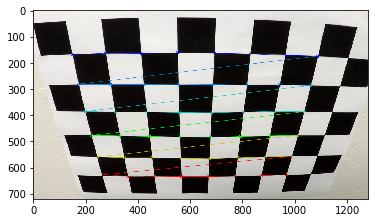

In [10]:
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)

In [16]:
import glob
images = glob.glob("camera_cal/calibration*.jpg")

In [18]:
for image in images:
    img = mpimg.imread(image)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #plt.imshow(img)

In [19]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

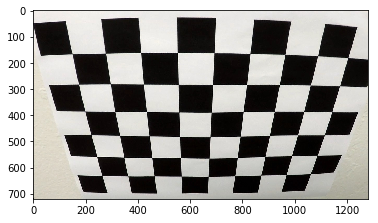

In [25]:
img = mpimg.imread("camera_cal/calibration2.jpg")
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(img)

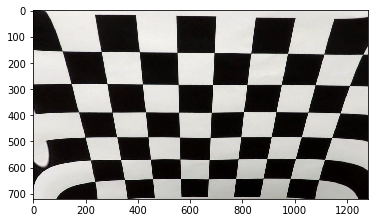

In [26]:
plt.imshow(dst)